Modeling gene expression with differential equations

constiutive gene expression -> constant, no regulation

reaction kinetics, rate * concentration 

In [11]:
import numpy as np
from scipy.integrate import odeint
import dnaplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [12]:
# example: repressilator 

# def repressilator(y, t):
#     mtet, mlac, mgamma, tet, lac, gamma = y
    
#     dmtet = -mtet + (alpha / (1 + lac**n)) + leak
#     dtet = -beta * (tet - mtet)
    
#     dmlac = -mlac + (alpha / (1 + gamma**n)) + leak
#     dlac = -beta * (lac - mlac)
    
#     dmgamma = -mgamma + (alpha / (1 + tet**n)) + leak
#     dgamma = -beta * (gamma - mgamma)
#     return [dmtet, dmlac, dmgamma, dtet, dlac, dgamma]

## Modeling constituitively active mRNA transcription & translation

In [43]:
alpha_m = 1.0
beta_m = 0.1
alpha_p = 2
beta_p = 0.05

m,p = initial_conditions = [0.1, 0]

def transcription_model(y,t):
    m,p = y # this expands the input vector to the variables
    dmdt = alpha_m - beta_m * m
    dpdt = alpha_p * m - beta_p * p
    return [dmdt, dpdt]

t = np.arange(0, 100, 1)
ym, yp = zip(*odeint(transcription_model, initial_conditions, t))

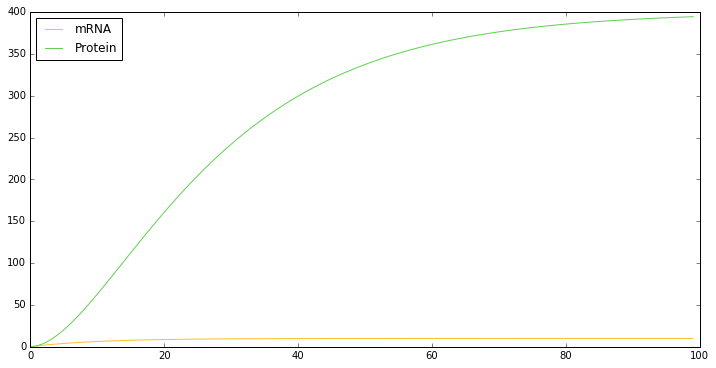

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(t, ym, color=[1.00, 0.75, 0.17], label='mRNA');
plt.plot(t, yp, color=[0.38, 0.82, 0.32], label='Protein');
plt.legend(loc='best');

## Modeling a repressor 

In [156]:
alpha_m = 1
beta_m = 0.1

alpha_p = 2
beta_p = 0.05

alpha_o = 0.01

mr,pr,mt,pt = initial_conditions = [0.1, 0, 10, 0]

def repressor_model(y,t,k,n):
    
    mr,pr, mt,pt = y
    
    # repressor, constiuitively active
    dmrdt = alpha_m - beta_m * mr
    dprdt = alpha_p * mr - beta_p * pr
    
    # target protein
    dmtdr = alpha_o - beta_m * mt   + alpha_m * ( 1 / ( 1 + (pr / k)**n)) 
    
    dptdt = alpha_p * mt - beta_p * pt
    
    return [dmrdt, dprdt, dmtdr, dptdt]

t = np.arange(0, 100, 1)

_n = 2
_k = 200

ymr, ypr, ymt, ypt = zip(*odeint(repressor_model, initial_conditions, t, (_k,_n)))

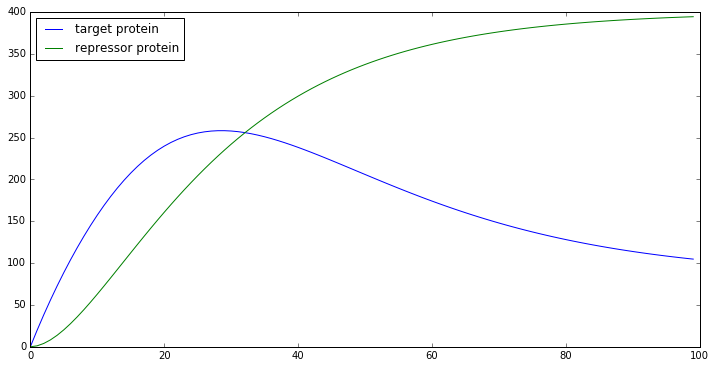

In [157]:
plt.figure(figsize=(12, 6))
# plt.plot(t, ymt, label='target mRNA');
plt.plot(t, ypt, label='target protein');
plt.plot(t, ypr, label='repressor protein');
# plt.plot(t, ymr, label='repressor mRNA');
plt.legend(loc='best');

In [135]:
from bokeh.io import push_notebook
from bokeh.plotting import figure, show, output_notebook

In [136]:
output_notebook()

Loading BokehJS ...

In [158]:
p = figure(title=None, 
           plot_height=300, 
           plot_width=600, 
           toolbar_location="below",
           tools="pan,wheel_zoom,box_zoom,reset,hover")

r = p.line(t, ypr, name='repressor protein', color='red')
r = p.line(t, ypt, name='target protein',  color='blue')

show(p);

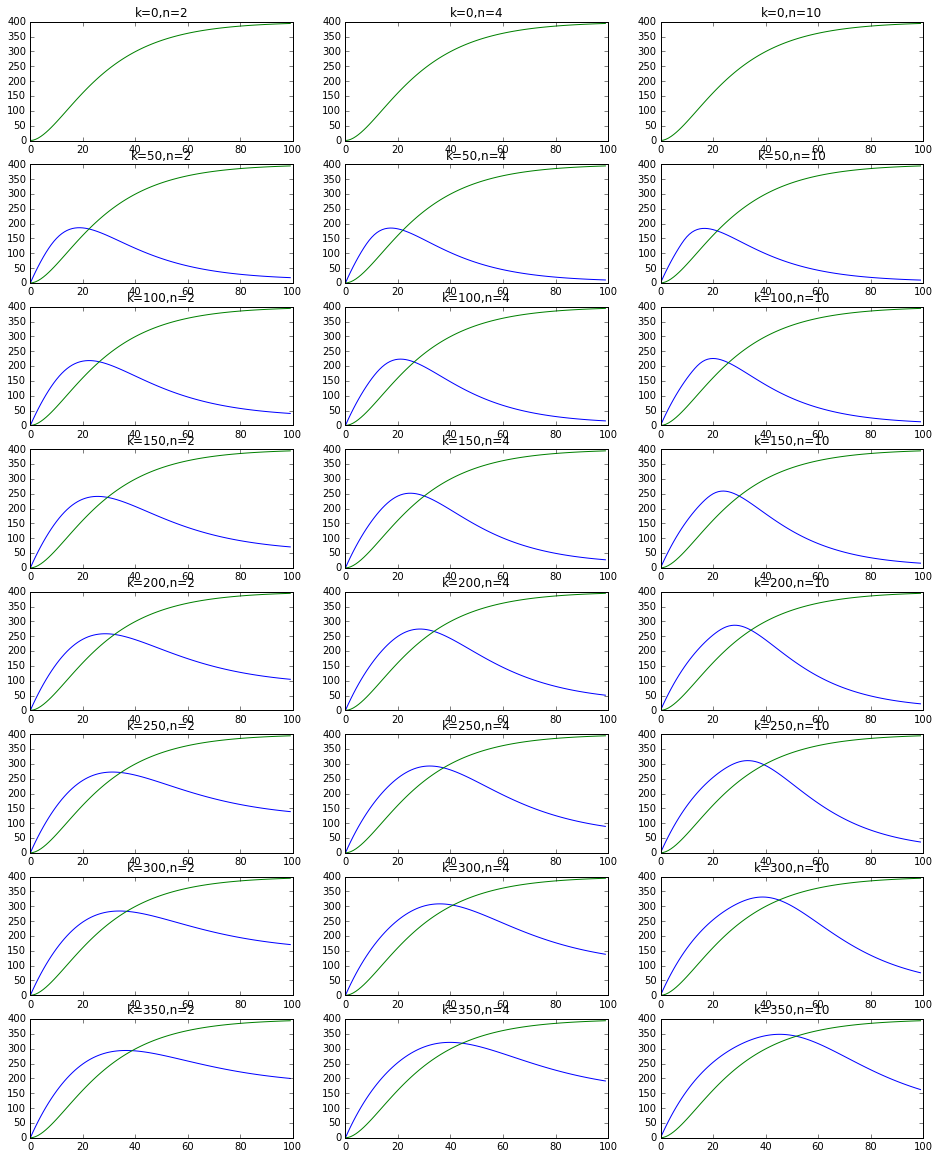

In [159]:
f, axes = plt.subplots(8,3, figsize=(16,20))

# k = when respression will occur
# n = hill coefficient

for i, _k in enumerate(range(0, 400, 50)):
    for j, _n in enumerate([2, 4, 10]): 

        ymr, ypr, ymt, ypt = zip(*odeint(repressor_model, initial_conditions, t, (_k,_n)))

#         axes[i,j].plot(t, ymt, label='target mRNA');
        axes[i,j].plot(t, ypt, label='target protein');
#         axes[i,j].plot(t, ymr, label='repressor mRNA');
        axes[i,j].plot(t, ypr, label='repressor protein');
        axes[i,j].set_title('k=%d,n=%d' % (_k, _n))
        if n== 0:
            axes[n].legend(loc='best');

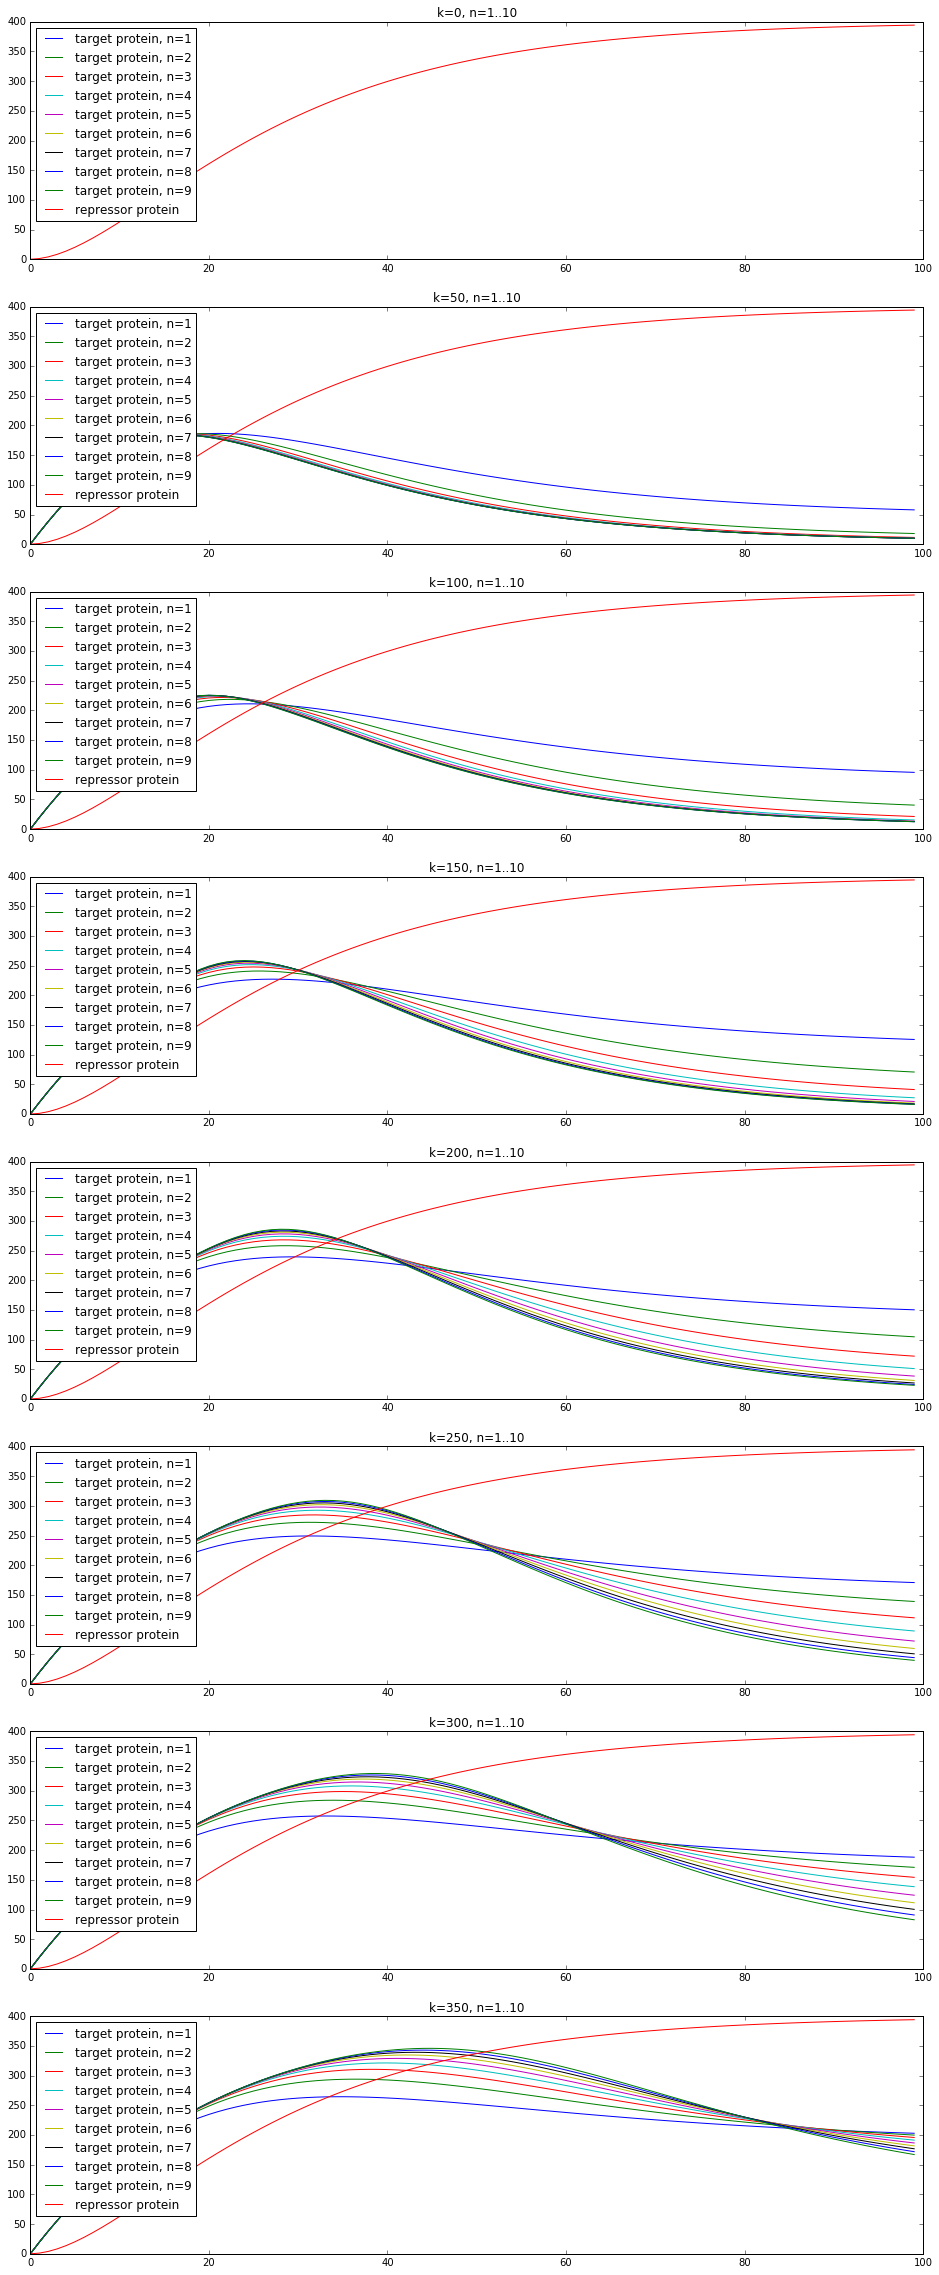

In [177]:
f, axes = plt.subplots(8,1, figsize=(16,40))

# k = when respression will occur
# n = hill coefficient

for i, _k in enumerate(range(0, 400, 50)):
    
    for j, _n in enumerate(range(1,10)): 

        ymr, ypr, ymt, ypt = zip(*odeint(repressor_model, initial_conditions, t, (_k,_n)))
#         axes[i].plot(t, ymt, label='target mRNA');
        axes[i].plot(t, ypt, label='target protein, n=%d' % _n);
#         axes[i].plot(t, ymr, label='repressor mRNA');

    axes[i].plot(t, ypr, label='repressor protein');
    axes[i].set_title('k=%d, n=1..10' % (_k))
        
    axes[i].legend(loc='upper left');
    
    